# Assignment 1

# Introduction & Data: 

We will learn how to implement the Least square and the least mean square method. 

We will use "Housing" database to predict the price of the house using various features. 

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.There are almost 20k samples with more than 10 features. 

This dataset primarily gives details of the area of the home, number of rooms, address of the house and their cost. As a beginner, handling this dataset would be a straightforward idea to understand regression. 

This data has been taken from kaggle and I have downloaded the .csv file on my machine. 

Below are the attributes: 

ID: unique id of every home 
Date: Since this data has been gathered between May 2014 to May 2015, all the dates values fall within this oe year range. Price: mentions the cost of each home 
Bedrooms: Specifies the number of bedrooms the house has 
Bathroom: Specifies the number of bathrooms the house has 
SQFT living and lot: area of the house 
Floors: the number of floors the home would have 
Waterfront: binary values for yes or no of waterfront for the home. 
view: Binary values if the home will have a view or not 
codition: Rating scale of 1-5 to rate the condition of the home 
grade: to specify the grade of the home 
sqft above and sqft basement: independent entries describe the area of upper floor and basement of the house yr_built and yr_renovated: Gives the year value in which it was built and renovated respectively 
zipcode: value of the area zipcode 
lat & long: specifies the values of latitude and longitude. 
sqft_living15 and sqft_lot15: if there is any change then these new area values are mentioned to distinguish the same. 

# Data, Cleaning and Visualization: 

Note: Observations will be noted below each graph. 

In [3]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

C:\Users\Ketki\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


To import all the packages that we require for further computation. 


In [4]:
data = pd.read_csv(r"C:\Users\Ketki\Desktop\Kaggle\kc_house_data.csv")

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Here the data is saved in variable "data" which is read using pandas from .csv file that is stored in local machine. 
The data.head() will display top 5 row of the dataset by default. 

In [5]:
print(data.shape)

(21613, 21)


This shows that there are 21613 features with 21 features in this dataset. 


In [6]:
print(data.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [7]:
df = pd.DataFrame(data)

In [8]:
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955 

In [9]:
print(data.shape)

(21613, 21)


In [10]:
print(data.price.shape)

(21613,)


Here we hve data in numeric format already and we can easily plot the values correctly. . 
 
Here we can plot price against every variable/feature available in the data to see how it impacts the outcome. 

We shall later split the dataset in training and testing dataset. 

In [11]:
X_data = df.drop('price',axis=1)
Y_data = df['price']

Since we are trying to visualize the data, lets analyse how "Price" could be infuenced with various features available for further analysis. 

<function seaborn.utils.despine>

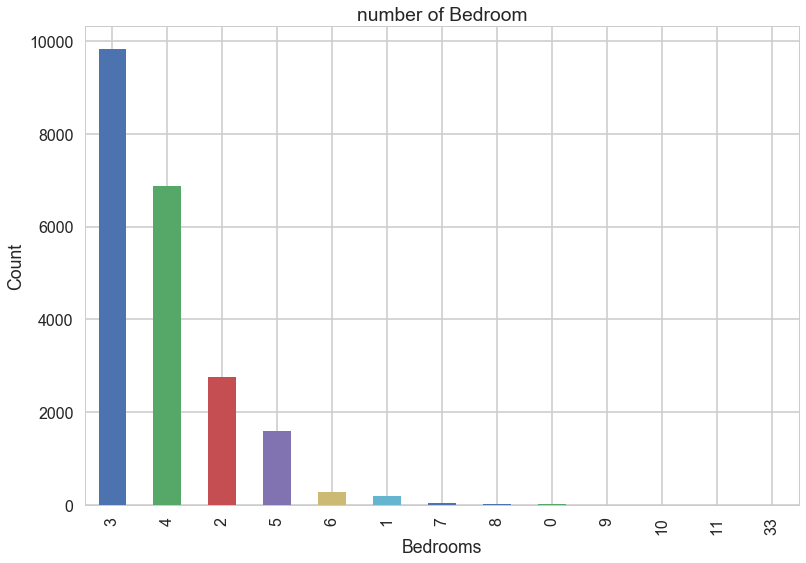

In [12]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

While understanding the data, lets understand the details hidden here. We have plotted the number of bedrooms and the count. This count is nothing but the amount of houses which has n number of bedrooms. 

We will read the graph like this: Approximately 9900 homes are with 3 bedrooms followed by 7000 of 4 bedrooms and so on. 

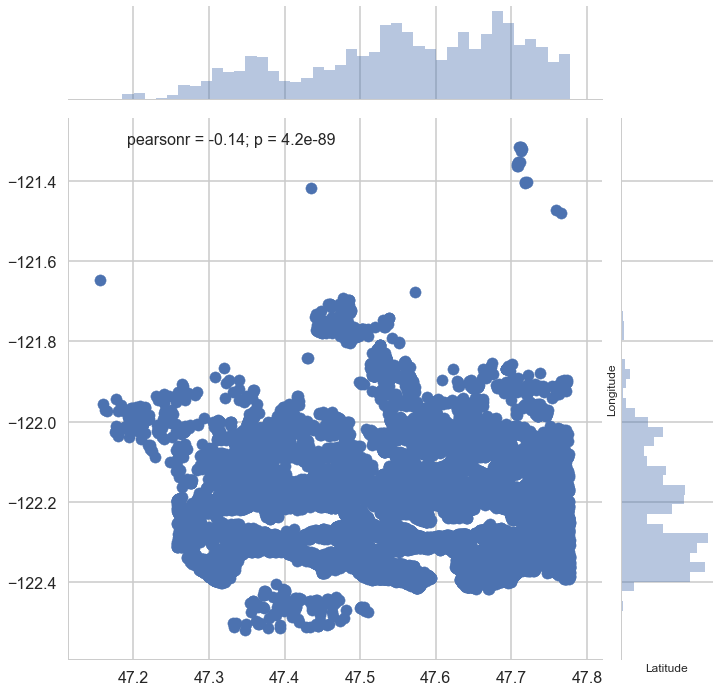

TypeError: 'module' object is not callable

In [13]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt1 = plt()
sns.despine

Our data gives latitude and longitude details. We could observe it such as the X axis shows latitude and Y axis shows longitude data. The datapoints are represented by houses that are lying between a given latitude and longitude. 

Here 47.3 to 47.8 shows the majority of the datapoints. 

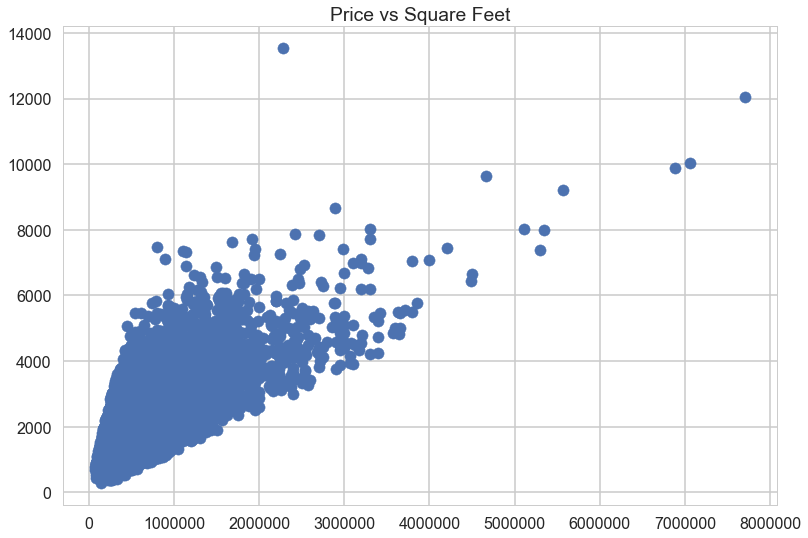

In [14]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square Feet")

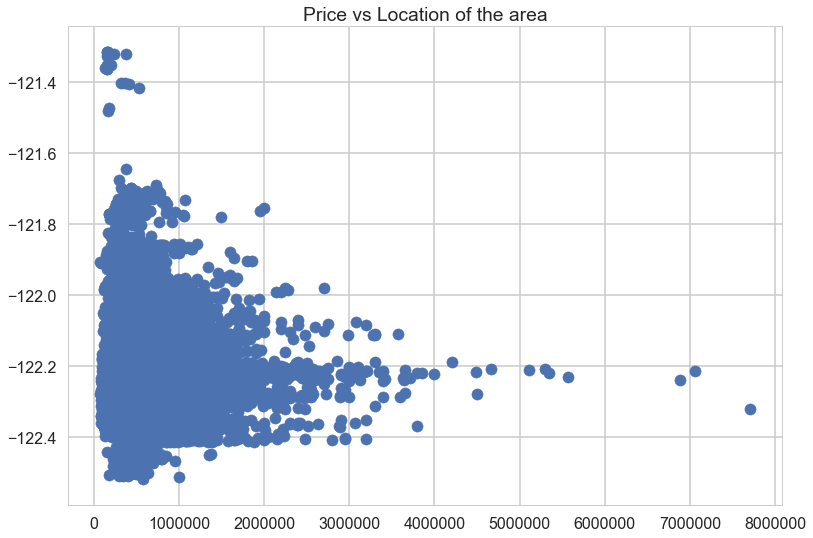

In [15]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

Lets look at the most obvious factor affecting the housing prices from the given data. 

1> The fist plot, "Price vs SQFT" shows how price changes with respect to the square feet area of the house. 
   We can easily observe that bigger the area, more is the cost of the home. 
   
2> In the next graph, "Price VS Location" we have location as a feature that determines how the price varies. 
   -122.50 to -121.50 shows majority of homes in this reagion. 
   
   



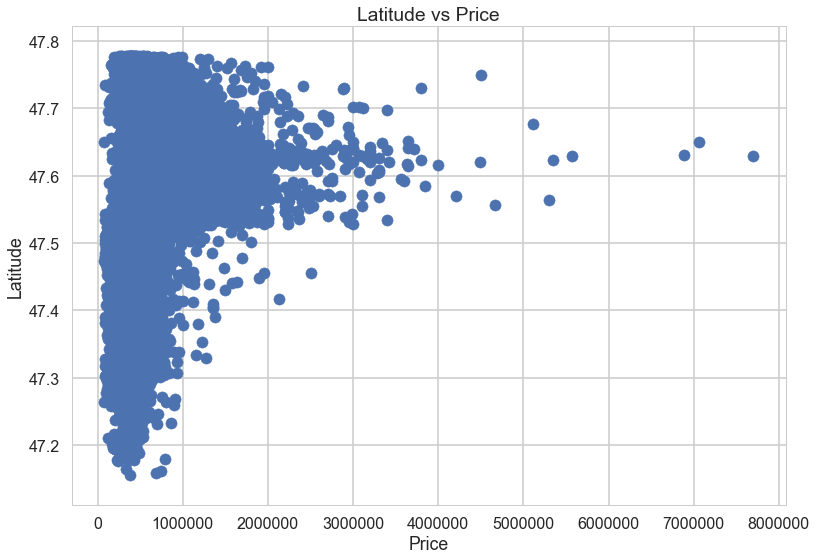

In [16]:
plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

As we saw in the above graph where we have discussed latitude and logitude of the area in which many homes are located, we analysed that majority of homes are in 47.2 to 47.8 latitude. Thus lets plot the "price" for this latitude and longitude. 



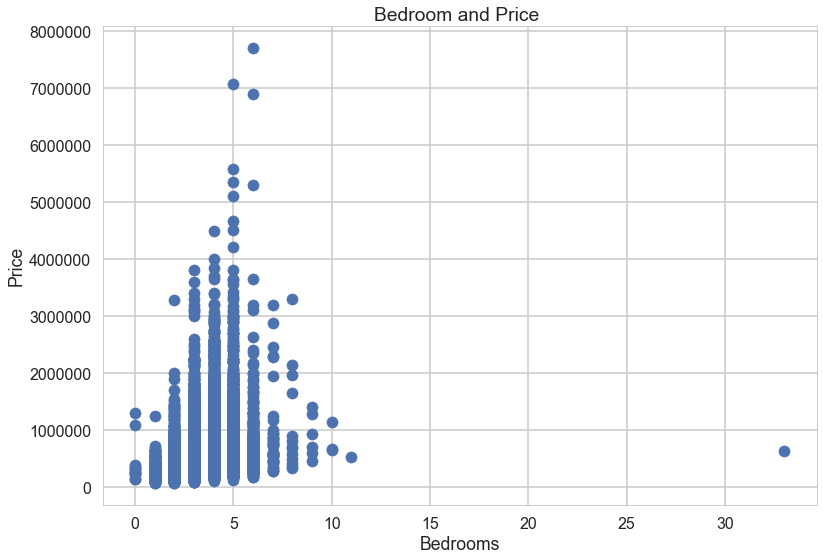

<function seaborn.utils.despine>

In [17]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

Similar to latitude and longitude we will use the scatter matrix for number of bedrooms and price of the house. 
The interesting pattern in this scatter plot is that there is only one home with 33 bedrooms in it and hence that one is the outlier at the right hand side corner. 

Most of the data is between 0-10 bedrooms and as the number of bedrooms increases, the price of that house increases.



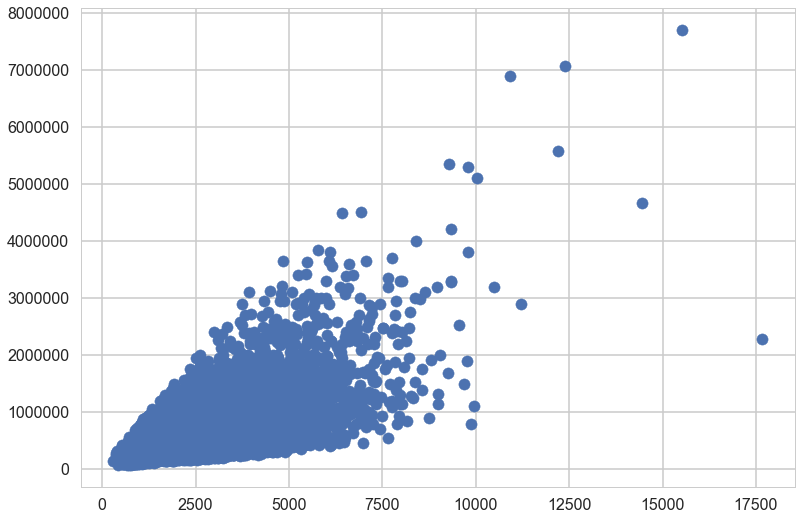

In [18]:
plt.scatter((data['sqft_living']+data['sqft_basement']),data['price'])

Again, for the sqft living and basement area we can see how the cost changes. 

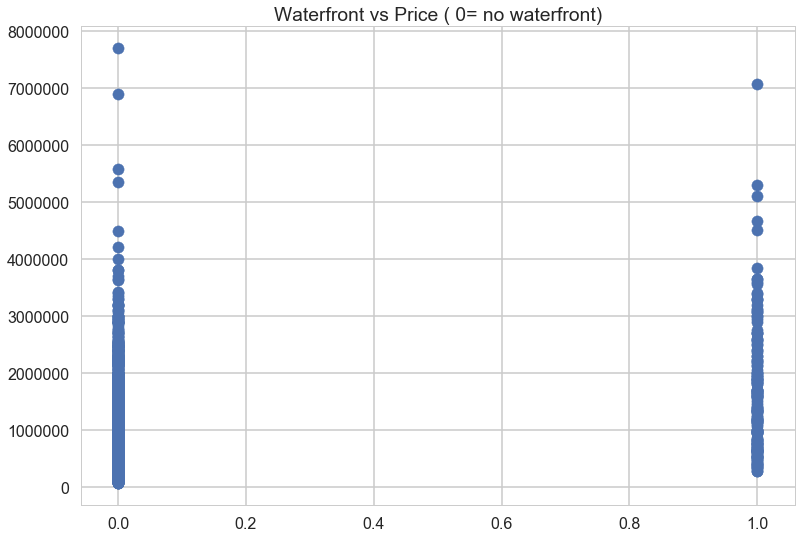

In [19]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

Now here we have used 0 as no waterfront and 1 means yes there is a waterfront for this home. 
The datapoints indicate the trend of price by having a waterfront and for not having a waterfront. 

In [20]:

labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates

In [21]:
from sklearn.cross_validation import train_test_split

C:\Users\Ketki\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We will split the data in training and testing in 80:20 ratio. 

In [22]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X_data, Y_data, test_size = 0.20, random_state = 5)
print("Training dataset size",X_train.shape)
print("Testing dataset size",X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

Training dataset size (17290, 20)
Testing dataset size (4323, 20)
(17290,)
(4323,)


# Method:

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

# Least square:

In [25]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        self.w=np.zeros((X.shape[1],1))
        self.w = np.linalg.inv(X.T@X)@X.T@T
        
    
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        self._check_matrix(X, 'X')
        return X@self.w
        #pass  

In the above code we are trying to calculate Least Square using class and abstract class method. 
We have learned in class note that: 

Least square formula could be implemented using three techniques: 

w = np.linalg.inv(X1.T @ X1) @ X1.T @ T 

or

w = np.linalg.lstsq(X1.T @ X1, X1.T @ T)[0]

or

w = np.linalg.solve(X1.T @ X1, X1.T @ T)


Now, in this notebook, we are using the formula of inverse that is the first one because the dimensions of the dataset is non linear. If we use lstsq method to calculate the least square then whileplotting the data it would crash with the erro stating that the data is non linear. 

Here we are also assigning weights to every coefficient of x. The shape[1] will amend one's to the columns and shape[0] indicates rows in the code as we proceed below. 

# Least Mean square:

In [26]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):  
        LinearModel.__init__(self) 
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for i in range(X.shape[0]):
            self.train_step(X[i],T[i])
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x=np.asmatrix(x)
        x = np.hstack((np.ones((x.shape[0], 1)), x))
        t = t.reshape(t.shape[0],1)
        
        if(self.w is None):
            self.w = np.zeros((x.shape[1],1))
        self.w -= self.alpha*((x@self.w - t)@x).T
    
    # apply the current model to data X
    def use(self, X):
        X = self.add_ones(X)
        return X@self.w
        

We have learnt about the sequential training in class and here we will process the batch training. 
For further computation, we will keep everything in matrix format. 

In the train_step defined function, we have converted our x as matrix. This could have been reshaped but we would move on to the next step and if the preliminery fails then we could do the reverse engineering for the function. 

Since our add_ones function is returning "np.hstack((np.ones((x.shape[0], 1)), x))", we will use this value for x in this function to horizontally stack the values. 

The target variable t will be reshaped for all the rows.What we have learnt in cost function and gradient descent, here the alpha is our learning rate. This explains the learning rate at which it will achieve the minimum i.e. how fast/slow it can reach the lowest point of curve. 

At last, use function should return the preicted values for X by multiplying weights to the input X (X.w)


# Experiment: 

In [27]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

Lets try to fit the Least Square method for our data: 

In [29]:

ipt = data.iloc[:,2:21]
X_ip = np.asmatrix(ipt)
opt = data.iloc[:,2]
T_op = np.asmatrix(opt)
X_mean = np.mean(X_ip,axis=0)
print("shape of input",X_mean.shape)

X_std = np.std(X_ip, axis=0)
print("standard deviation",X_std.shape)

shape of input (1, 19)
standard deviation (1, 19)


In the snippet above, we will take all the rows for input data and columns from second to end (counting from zero)
we will convert this into matrix format and calculate statistics of the data. Our aim is to normalize the data for further analysis. 

Interesting learning: without normalization the data kept  executing and the system crashed. It was giving the behavior of infinite loop and hence to fasten up the process we can proceed further by normalization. 

We have calculated mean and standard deviation of the data.

Here another important learning is the matrix multiplication technique. We will ensure that our X and Y are in same dimentions else plotting will throw an error. Also the ID and date values are dropped from plot to ensure we proceed with the numeric values. These dropped values would not completely influence the outcome and hence are safe to drop at this point of time. 

The mean and SD both show (1,19) dim and it will then turned to be 1@1 matrix. 

In [30]:


X_ip = (X_ip-X_mean)/X_std
T_op = T_op.reshape((21613,1))
print("shape of predicor", X_ip.shape)
print("shape of target", T_op.shape)
np.std(X_ip)

shape of predicor (21613, 19)
shape of target (21613, 1)


1.0

<class 'numpy.ndarray'>


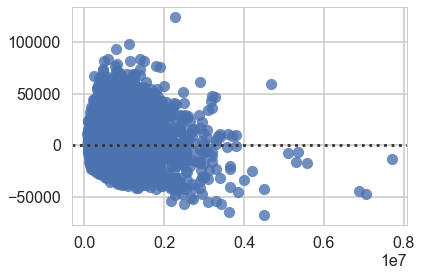

In [31]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

ls = LinearRegress()

ls.train(X_ip, T_op)
Predict_t= ls.use(X_ip)

print(type(np.array(Predict_t)))
seaborn.residplot(np.array(T_op),np.array(Predict_t))

We shall go ahead and plot the data to predict "price" of the house. 
The X Axis shows the value of attributes and Y axis gives us the cost i.e price. By looking at the data points in X and Y plane we can analyse the price of that home with respect to all the predictors. 

<class 'numpy.ndarray'>
[[ 601321.91054725]]
[[ 604000.]]


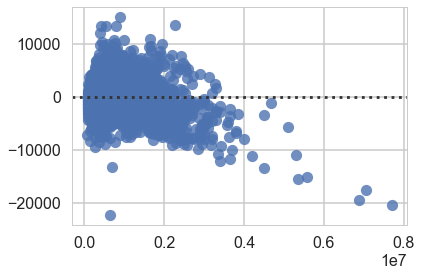

In [32]:
lms = LMS(0.001) 
lms.train(X_ip, T_op)
Predict_t1= lms.use(X_ip)
print(type(np.array(Predict_t1))) 
print(Predict_t1[3,:])
print(T_op[3,:])
seaborn.residplot(np.array(T_op),np.array(Predict_t1))

The least mean square method we will have additional parameters in calculation along with the learning rate alpha. 
By default the alpha value will be set to 0.1 however in the graph above, I have plotted the learning rate as 0.003 to get near to correct predictions for the price of the house. 
We read the graph as predictor vs target where predictors are our attributes and target is the price of the home that changes, 

For validation and simplicity in understanding, I have mentioned only 3rd column (randomly selected) in my dataset so that we can cross validate if this shows the correct output or no. 


# Compare and contrast:

The least mean square is using all of the data to train and plot the best fit. In the larger datasets it could be costly as it will take the whole dataset at once. 

The LMS method can be applicable to the dataset by sending the data one by one and then updating the parameters accordingly.
Using the updated parameters, it makes a new estimation and repeat these steps. 

Unlike LS, we use stochastoc gradient descent with alpha as a learning rate. 

In the implementation, the train function of LS and LSM is a lot different than eachother. 
In LS it trains on data at once but in LMS it is an iterative process.

In the experiement when we apply these plots to our dataset, the first plot takes the values at once and predicts the target that is price and in the second plot for LMS, it learns with alpha 0.001, updates the parameter and reiterates the step.

LMS is more cost effective than LS. 



Below are the graphs that are part of the problem statement and we would require them to be able to finish the preliminery test. 

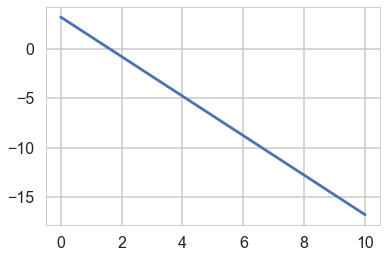

In [33]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls1 = LinearRegress()
ls1.train(X, T)

plt.plot(ls1.use(X))

Here the math is working in such a way that on X axis we have 0 to 10 values ployyed with the interval of 2. 
On T = -2 * X + 3.2 , it is (-2*0 + 3.2 = 3.2) hence the first point will be plotted on 3.2 at the top on the y axis. 
Similarly all the points are plotted with this calculation. 



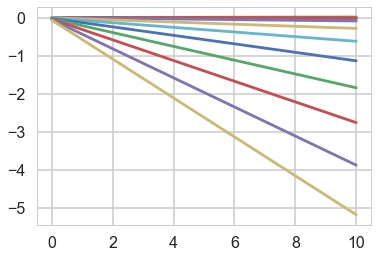

In [34]:
lms = LMS(0.001)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

Making the changes in alpha can show us sme difference in graph. 
This is the decision to make how fast or slow the model should learn. It is wise to keep it slow as 0.001 for now keeping the fact in mind that it should not exceed the minimum (i.e zero) and get back to adjustment. 

This way it is converging as expected. 

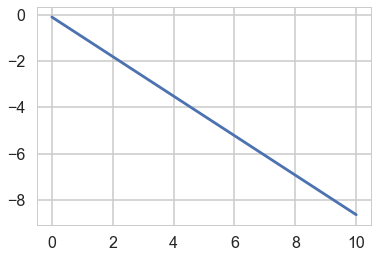

In [35]:
lms.train(X,T)
plt.plot(lms.use(X))

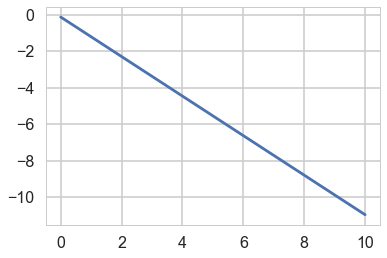

In [36]:
lms.train(X, T)
plt.plot(lms.use(X))

# Preliminary Test:

In [37]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


Since the preliminery test shows expected results we can conclude that the methods are implemented as instructed. 

# Conclusion: 

This assignment helped us in practical mplementation of mathematical concepts of Machine Learning, How least square and least mean square works, what are weights and what role they play in regression, what is regression. 

It also introduces to the concept of super class, abstract method of class and constructors along with implementation of functions in Python. 
We learned to code math in python and how to reuse a part of the code for further analysis on dataset in experiment session.

Suggestions: 

Lets reduce the complexity of dataset and focus more on concept implementation. 
Lets try to synthesize class material more towards assignments. 

# References: 

https://github.com/Shreyas3108/house-price-prediction/blob/master/housesales.ipynb 
https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/ 
www.machinelearningmastery.com/

Assignment 0 details,

Linear model solution given in class by professor jake Lee.

Forest fire example for understanding the least square and least mean square methods. 

Suhas Raju for understanding methods.

Hand-On-Machine Learning Textbook by O'Reilly Media.



